In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.linalg import eig

In [2]:
nrep = 1  # number of replications

path_main='C:/shehani/postdoc_work/ML_Diffusion/md_data/c4_nmeth_frozen_single_23h2o_box1/'
path = [None] * (nrep)
nn = 0
while (nn<nrep):
    path[nn] = path_main +'md'+str(nn+1)
    nn = nn+1



path[0] = 'C:/shehani/postdoc_work/ML_Diffusion/md_data/c4_nmeth_frozen_single_23h2o_box1/'


In [3]:
nrep =len(path)
nrep

1

In [4]:
f=open(path[0] +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])

nsteps = int((nsteps/MDRestartFrequency)+1)-1 #+ int((nsteps2/MDRestartFrequency)+1)-2 #+int((nsteps3/MDRestartFrequency)+1)
#nsteps = 5000
#nsteps = 744
nstep = nsteps
        
print('nsteps:','  ',nsteps )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    1000
natoms:    383
nonmvat:    312
nmovingatoms:    71
MDRestartFrequency:    10
dt:    1.0
noh:    1
nwater:    23
nox:    24
nhy:    47
xbox:    15.198
ybox:    13.392
zbox:    15.0


In [5]:
x_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
y_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)
z_oh = np.empty(nsteps*nrep).reshape(nrep,nsteps)

In [6]:
kk = 0
while (kk<nrep):
    ii = 0
    f=open(path[kk] +'/oh1.dat','r')
    lines=f.readlines()
    for line in lines[:nsteps]:
        data=line.split()
        x_oh[kk,ii]=float(data[2])
        y_oh[kk,ii]=float(data[3])
        z_oh[kk,ii]=float(data[4])
        ii = ii+1
    f.close()
    kk = kk+1

In [7]:
kk = 0
while (kk<nrep):
    print(kk)
    ll = 0
    x_old = x_oh[kk,0]
    y_old = y_oh[kk,0]
    while ll<(nsteps):
        ijk = 1
        while ijk < 2:
            ijk = ijk+1
            if abs(x_oh[kk,ll]-x_old)>5:
                if x_oh[kk,ll]>x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]-xbox
                    ijk = 1
                elif x_oh[kk,ll]<x_old:
                    x_oh[kk,ll] = x_oh[kk,ll]+xbox
                    ijk = 1
            if abs(y_oh[kk,ll]-y_old)>5: # atom need to be moved in y
                if y_oh[kk,ll]>y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]-ybox
                    ijk = 1
                elif y_oh[kk,ll]<y_old:
                    y_oh[kk,ll] = y_oh[kk,ll]+ybox
                    ijk = 1
        x_old = x_oh[kk,ll]
        y_old = y_oh[kk,ll]
        ll = ll+1
    
    
    kk = kk+1

0


In [8]:
"""
ndt = 50
mmsdx = np.empty(ndt)
mmsdy = np.empty(ndt)
mmsdz = np.empty(ndt)
mmsdxy = np.empty(ndt)
mmsdxz = np.empty(ndt)
mmsdyz = np.empty(ndt)
dtime = np.empty(ndt)
dtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)


kk = 0
while kk<ndt:
    mmsdx[kk] = 0.0
    mmsdy[kk] = 0.0
    mmsdz[kk] = 0.0
    mmsdxy[kk] = 0.0
    mmsdxz[kk] = 0.0
    mmsdyz[kk] = 0.0
    jj = 0
    while jj< (nsteps-1-kk):
        ll = 0
        while ll< (nrep):
            mmsdx[kk] = (x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])**2+mmsdx[kk]
#            print(ll,jj,kk,(x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])**2,mmsdx[kk])
            mmsdy[kk] = (y_oh[ll,(jj+kk+1)]-y_oh[ll,jj])**2+mmsdy[kk]
            mmsdz[kk] = (z_oh[ll,(jj+kk+1)]-z_oh[ll,jj])**2+mmsdz[kk]
            mmsdxy[kk] = ((x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])*(y_oh[ll,(jj+kk+1)]-y_oh[ll,jj]))+mmsdxy[kk]
            mmsdxz[kk] = ((x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])*(z_oh[ll,(jj+kk+1)]-z_oh[ll,jj]))+mmsdxz[kk]
            mmsdyz[kk] = ((y_oh[ll,(jj+kk+1)]-y_oh[ll,jj])*(z_oh[ll,(jj+kk+1)]-z_oh[ll,jj]))+mmsdyz[kk]
            ll = ll+1
#        mmsdx[kk] = mmsdx[kk]/nrep
#        mmsdy[kk] = mmsdy[kk]/nrep
#        mmsdz[kk] = mmsdz[kk]/nrep
#        mmsdxy[kk] = mmsdxy[kk]/nrep
#        mmsdxz[kk] = mmsdxz[kk]/nrep
#        mmsdyz[kk] = mmsdyz[kk]/nrep
        jj = jj+1
    mmsdx[kk] = mmsdx[kk]/((nsteps-1-kk)*nrep)
    mmsdy[kk] = mmsdy[kk]/((nsteps-1-kk)*nrep)
    mmsdz[kk] = mmsdz[kk]/((nsteps-1-kk)*nrep)
    mmsdxy[kk] = mmsdxy[kk]/((nsteps-1-kk)*nrep)
    mmsdxz[kk] = mmsdxz[kk]/((nsteps-1-kk)*nrep)
    mmsdyz[kk] = mmsdyz[kk]/((nsteps-1-kk)*nrep)
    kk = kk+1
    
"""

'\nndt = 50\nmmsdx = np.empty(ndt)\nmmsdy = np.empty(ndt)\nmmsdz = np.empty(ndt)\nmmsdxy = np.empty(ndt)\nmmsdxz = np.empty(ndt)\nmmsdyz = np.empty(ndt)\ndtime = np.empty(ndt)\ndtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)\n\n\nkk = 0\nwhile kk<ndt:\n    mmsdx[kk] = 0.0\n    mmsdy[kk] = 0.0\n    mmsdz[kk] = 0.0\n    mmsdxy[kk] = 0.0\n    mmsdxz[kk] = 0.0\n    mmsdyz[kk] = 0.0\n    jj = 0\n    while jj< (nsteps-1-kk):\n        ll = 0\n        while ll< (nrep):\n            mmsdx[kk] = (x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])**2+mmsdx[kk]\n#            print(ll,jj,kk,(x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])**2,mmsdx[kk])\n            mmsdy[kk] = (y_oh[ll,(jj+kk+1)]-y_oh[ll,jj])**2+mmsdy[kk]\n            mmsdz[kk] = (z_oh[ll,(jj+kk+1)]-z_oh[ll,jj])**2+mmsdz[kk]\n            mmsdxy[kk] = ((x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])*(y_oh[ll,(jj+kk+1)]-y_oh[ll,jj]))+mmsdxy[kk]\n            mmsdxz[kk] = ((x_oh[ll,(jj+kk+1)]-x_oh[ll,jj])*(z_oh[ll,(jj+kk+1)]-z_oh[ll,jj]))+mmsdxz[kk]\n            mmsdyz[kk] = ((y_oh[ll,

In [9]:
ndt = 500
mmsdx = np.empty(ndt)
mmsdy = np.empty(ndt)
mmsdz = np.empty(ndt)
mmsdxy = np.empty(ndt)
mmsdxz = np.empty(ndt)
mmsdyz = np.empty(ndt)
dtime = np.empty(ndt)
dtime=  np.arange(0.01, (0.01*ndt+0.01), 0.01)


kk = 0
while kk<ndt:
    mmsdx[kk] = 0.0
    mmsdy[kk] = 0.0
    mmsdz[kk] = 0.0
    mmsdxy[kk] = 0.0
    mmsdxz[kk] = 0.0
    mmsdyz[kk] = 0.0
    jj = 0
    while jj< ((nsteps/(kk+1))-1):
        ll = 0
        while ll< (nrep):
            mmsdx[kk] = (x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])**2+mmsdx[kk]
            mmsdy[kk] = (y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)])**2+mmsdy[kk]
            mmsdz[kk] = (z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)])**2+mmsdz[kk]
            mmsdxy[kk] = ((x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])*(y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)]))+mmsdxy[kk]
            mmsdxz[kk] = ((x_oh[ll,(jj*(kk+1)+kk+1)]-x_oh[ll,jj*(kk+1)])*(z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)]))+mmsdxz[kk]
            mmsdyz[kk] = ((y_oh[ll,(jj*(kk+1)+kk+1)]-y_oh[ll,jj*(kk+1)])*(z_oh[ll,(jj*(kk+1)+kk+1)]-z_oh[ll,jj*(kk+1)]))+mmsdyz[kk]
            ll = ll+1
#        mmsdx[kk] = mmsdx[kk]/nrep
#        mmsdy[kk] = mmsdy[kk]/nrep
#        mmsdz[kk] = mmsdz[kk]/nrep
#        mmsdxy[kk] = mmsdxy[kk]/nrep
#        mmsdxz[kk] = mmsdxz[kk]/nrep
#        mmsdyz[kk] = mmsdyz[kk]/nrep
        jj = jj+1
    mmsdx[kk] = mmsdx[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    mmsdy[kk] = mmsdy[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    mmsdz[kk] = mmsdz[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    mmsdxy[kk] = mmsdxy[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    mmsdxz[kk] = mmsdxz[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    mmsdyz[kk] = mmsdyz[kk]/(((math.ceil(nsteps/(kk+1))-1))*nrep)
    kk = kk+1

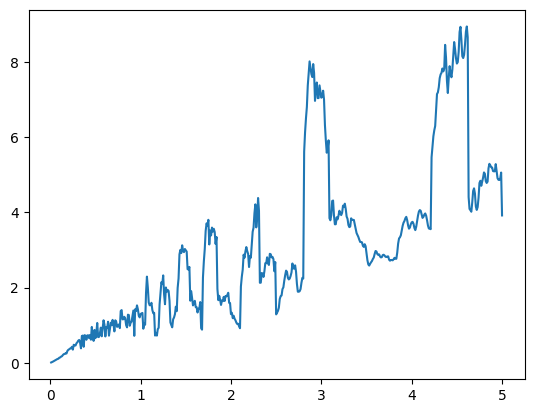

In [10]:
plt.figure()
plt.plot(dtime[:],mmsdx[:])

In [11]:
fitx=np.polyfit(dtime[:],mmsdx[:],1)
fity=np.polyfit(dtime[:],mmsdy[:],1)
fitz=np.polyfit(dtime[:],mmsdz[:],1)
fitxy=np.polyfit(dtime[:],mmsdxy[:],1)
fitxz=np.polyfit(dtime[:],mmsdxz[:],1)
fityz=np.polyfit(dtime[:],mmsdyz[:],1)
fitx

pred_msdx=fitx[0]*dtime+fitx[1]
pred_msdy=fity[0]*dtime+fity[1]
pred_msdz=fitz[0]*dtime+fitz[1]

errx = np.sqrt(np.sum((mmsdx-pred_msdx)**2)/len(mmsdx))
erry = np.sqrt(np.sum((mmsdy-pred_msdy)**2)/len(mmsdy))
errz = np.sqrt(np.sum((mmsdz-pred_msdz)**2)/len(mmsdz))
err2d = np.sqrt(errx**2+erry**2)
err2d

1.7570750069566523

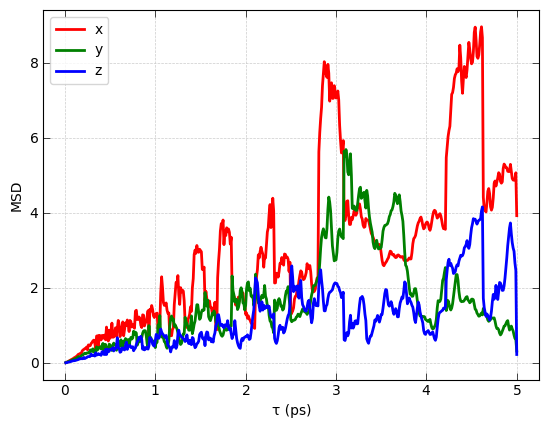

In [12]:
plt.figure()
plt.plot(dtime[:],mmsdx[:],color='r',linewidth=2,label="x")
plt.plot(dtime[:],mmsdy[:],color='g',linewidth=2,label="y")
plt.plot(dtime[:],mmsdz[:],color='b',linewidth=2,label="z")
#plt.plot(dtime[:],pred_msdx[:],'--',color='r',linewidth=2)

plt.legend(loc="upper left")
plt.xlabel('τ (ps)')
plt.ylabel('MSD')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.savefig(path[0] +'/msd.jpg', dpi=400)

In [13]:
dxx = fitx[0]/2
dyy = fity[0]/2
dzz = fitz[0]/2
dxy = fitxy[0]/2
dxz = fitxz[0]/2
dyz = fityz[0]/2

In [14]:
dd3d = np.array([[dxx, dxy, dxz], 
                 [dxy, dyy, dyz],
                 [dxz, dyz, dzz]])
w,v=eig(dd3d)

print('E-value:', w)
print('E-vector', v)
print('mamtrix', dd3d)

E-value: [ 0.76772021 -0.01820431  0.2642938 ]
E-vector [[ 0.87351387  0.48467965 -0.04537787]
 [ 0.3195661  -0.64125224 -0.69761957]
 [ 0.36722067 -0.59487915  0.71502991]]
mamtrix [[ 0.58205863  0.22833013  0.24293677]
 [ 0.22833013  0.19954048 -0.04868614]
 [ 0.24293677 -0.04868614  0.23221059]]


In [15]:
#print('Dx  =','{0: >#014.10f}'.format(w[0]))
#print('Dy  =','{0: >#014.10f}'.format(w[1]))
#print('Dz  =','{0: >#014.10f}'.format(w[2]))
#print('D   =','{0: >#014.10f}'.format((w[0]+w[1]+w[2])/3))
#print('-----------------------')
#print('Dx  =','{0: >#014.10f}'.format(dxx))
#print('Dy  =','{0: >#014.10f}'.format(dyy))
#print('Dz  =','{0: >#014.10f}'.format(dzz))
#print('D   =','{0: >#014.10f}'.format((dxx+dyy+dzz)/3))

In [16]:
dd2d = np.array([[dxx, dxy], 
                 [dxy, dyy]])
w2,v2=eig(dd2d)

print('Dx  =','{0: >#014.10f}'.format(w2[0]))
print('Dy  =','{0: >#014.10f}'.format(w2[1]))
print('D   =','{0: >#014.10f}'.format((w2[0]+w2[1])/2))
print('-----------------------')
print('Dx  =','{0: >#014.10f}'.format(dxx))
print('Dy  =','{0: >#014.10f}'.format(dyy))
print('D   =','{0: >#014.10f}'.format((dxx+dyy)/2))

Dx  =   0.6886496533
Dy  =   0.0929494582
D   =   0.3907995557
-----------------------
Dx  =   0.5820586275
Dy  =   0.1995404840
D   =   0.3907995557


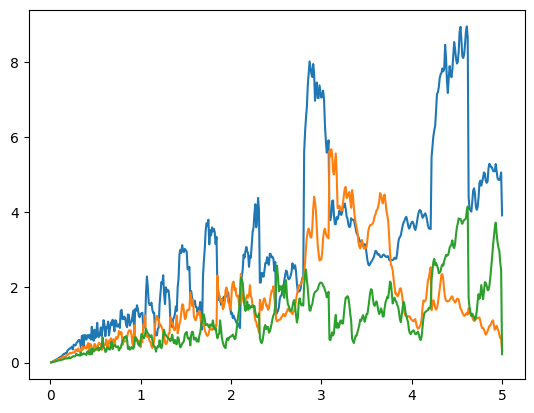

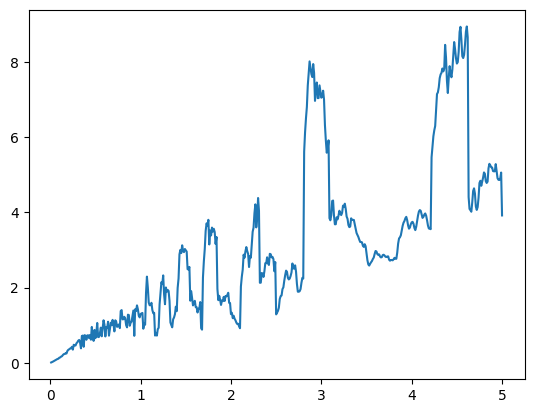

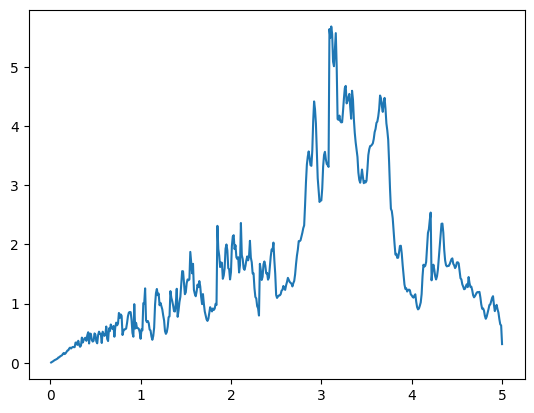

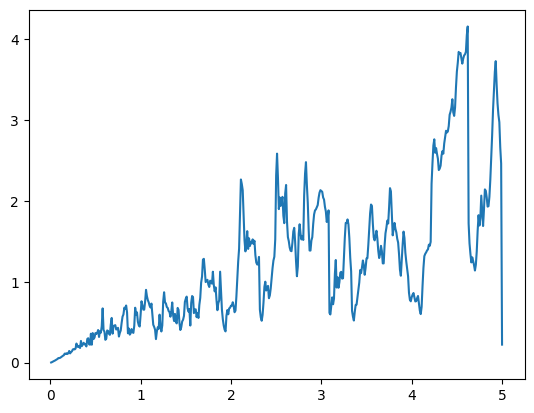

In [17]:
plt.figure()
plt.plot(dtime[:],mmsdx[:])
plt.plot(dtime[:],mmsdy[:])
plt.plot(dtime[:],mmsdz[:])

plt.figure()
plt.plot(dtime[:],mmsdx[:])
plt.figure()
plt.plot(dtime[:],mmsdy[:])
plt.figure()
plt.plot(dtime[:],mmsdz[:])

In [18]:
dxy

0.2283301296659406

In [19]:
print('Dxx  =','{0: >#014.10f}'.format(dxx),'{0: >#014.10f}'.format(errx))
print('Dyy  =','{0: >#014.10f}'.format(dyy),'{0: >#014.10f}'.format(erry))
print('Dxy  =','{0: >#014.10f}'.format(dxy))

print('Dx2d  =','{0: >#014.10f}'.format(w2[0]))
print('Dy2d  =','{0: >#014.10f}'.format(w2[1]))
print('D2d   =','{0: >#014.10f}'.format((w2[0]+w2[1])/2),'{0: >#014.10f}'.format(err2d*((w2[0]+w2[1])/2)/((w2[0]+w2[1]))))

Dxx  =   0.5820586275   1.3728659259
Dyy  =   0.1995404840   1.0966091964
Dxy  =   0.2283301297
Dx2d  =   0.6886496533
Dy2d  =   0.0929494582
D2d   =   0.3907995557   0.8785375035


In [20]:
print('{0: >#014.10f}'.format(dxx),'{0: >#014.10f}'.format(errx),'{0: >#014.10f}'.format(dyy),'{0: >#014.10f}'.format(erry),'{0: >#014.10f}'.format(dxy),'{0: >#014.10f}'.format(w2[0]),'{0: >#014.10f}'.format(w2[1]),'{0: >#014.10f}'.format((w2[0]+w2[1])/2),'{0: >#014.10f}'.format(err2d*((w2[0]+w2[1])/2)/((w2[0]+w2[1]))))

  0.5820586275   1.3728659259   0.1995404840   1.0966091964   0.2283301297   0.6886496533   0.0929494582   0.3907995557   0.8785375035


In [21]:
time = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200]
D_total = [0.5327,0.58389,0.684549,0.666614,0.6529819,0.57577,0.578130,0.668734,0.66858,0.65032,0.764150,0.76065,0.81810,0.76727,0.79086]
err_total = [0.17728,0.10244,0.09219,0.0706623,0.060871,0.05314,0.044939,0.05274,0.056327,0.05089,0.05119,0.04504,0.0409,0.036701,0.03944]

In [22]:
# D with tau_max
dt_max = [20,40,60,80,100,120,140,160,180,200,240,260,300,350,400,500,700,1000,1500,2000]
D_total = [0.78990,0.844908,0.832595,0.8420331,0.83441,0.8252254,0.819293,0.813791,0.804104,0.7968346,0.7980808,0.79245649,0.78311,0.764534,0.7659916,0.77680,0.813278,0.854097,0.85603,0.93243]
err_total = [0.003950,0.0076724,0.013358,0.018058,0.031722,0.042014,0.05038,0.062739,0.07592,0.083632,0.10172,0.119036,0.15133,0.1768,0.21154,0.29468,0.524870,0.858475,1.606223,2.46553]

dt_max_array = np.array(dt_max)

print(dt_max_array) 
dt_max_array = dt_max_array/100.0

[  20   40   60   80  100  120  140  160  180  200  240  260  300  350
  400  500  700 1000 1500 2000]


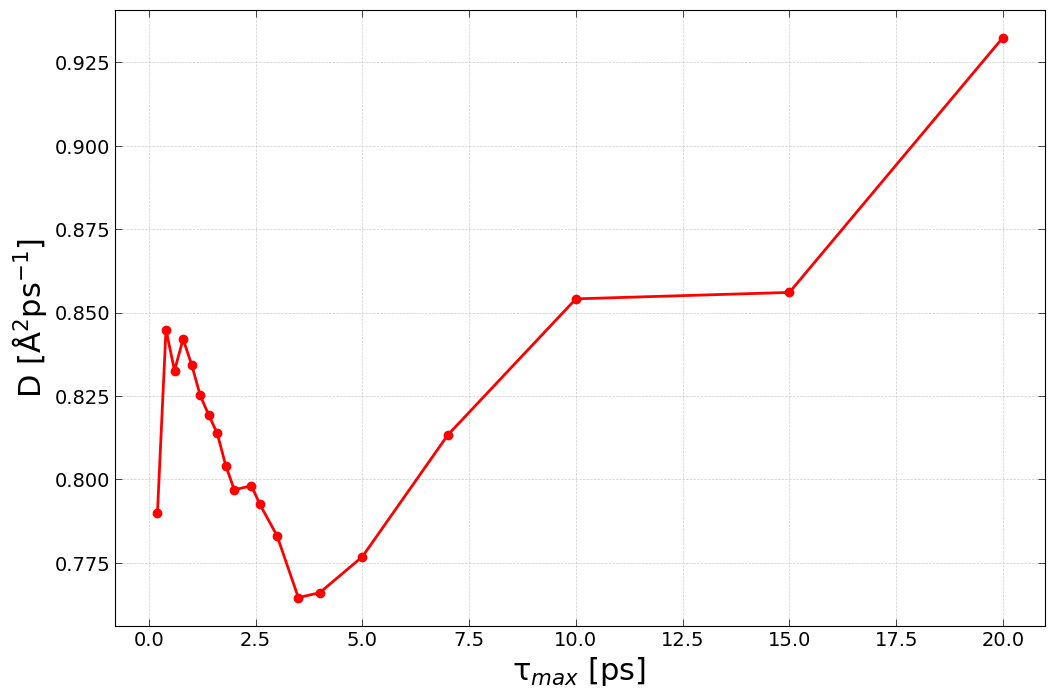

In [23]:
plt.figure(figsize=(12,8))
plt.xlabel("τ$_{max}$ [ps] ",fontsize=22)
plt.ylabel("D [Å$^2$ps$^{-1}$]",fontsize=22)

plt.plot(dt_max_array[:],D_total[:], '-o', linewidth=2, color='red')
#plt.errorbar(dt_max[:-5],D_total[:-5],yerr=err_total[:-5], fmt='o', color='r', linewidth=2, alpha=1, capsize=4,ecolor='B')


plt.tick_params(axis="x", which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y", which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="x", which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y", which='minor', direction="in", length=5, width=0.5)
plt.grid(which='major', color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig('C:/Users/Sachith/Desktop/work_oh/long/12_13/water20/D_with_tau.jpg', dpi=400)

ValueError: x and y must have same first dimension, but have shapes (15,) and (20,)

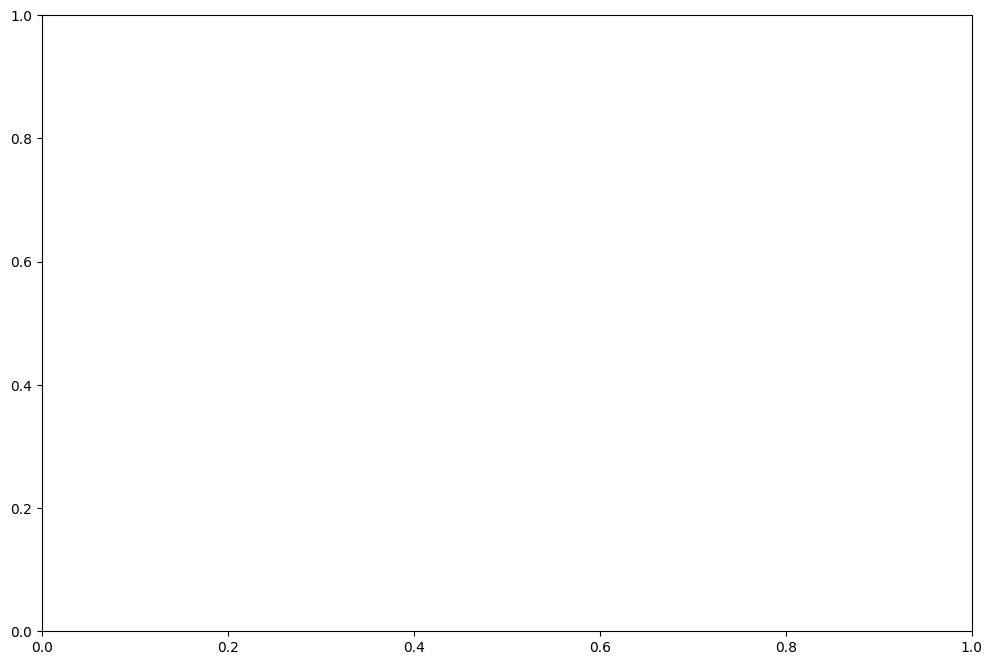

In [24]:
plt.figure(figsize=(12,8))
plt.plot(time[:],D_total[:],color='k',linewidth=2)
plt.xlabel('trajectory length [ps])',fontsize=22)
plt.ylabel("D [Å$^2$ps$^{-1}$]",fontsize=22)
plt.tick_params(axis="x", which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y", which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="x", which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y", which='minor', direction="in", length=5, width=0.5)
plt.grid(which='major', color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig('C:/Users/Sachith/Desktop/work_oh/long/12_13/water20/D_timelag_with_trajectory_length.jpg', dpi=400)

In [ ]:
dtime